## At first create a requirements.txt file and input the following in a seperate line
<li>matplotlib</li>
<li>pandas</li>
<li>jupyter</li>
<li>notebook</li>
<li>scikit-learn</li>
<li>seaborn</li>
finallty run the code pip install -r requirements.txt

## import the as mentioned 
<li>why import os</li>
<li> - import os provides interacting with the operating system. </li>
The "os" and "os.path" modules include many functions to interact with the file system.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


<li>we will use simple regression to predict the car price</li>
<li>objective</li>
    <li>- to know if the dealer is offering fair value for my trade -in</li>
    <li>- to know if i put a fair value on my car</li>

In [2]:
df = pd.read_csv("automobileEDA.csv") # loads the csv file in a variable df as a dataframe
df.head() # prints the first five row of the table

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<li> we will use dataset of Car price predication hosted on IBM Cloud object</li>

In [3]:
X = df.drop("price", axis=1)  # independent features , it makes a new table with all the columns except price 
y = df['price']   #dependent features, it makes a table with only price values in it

## Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)
#random state fixes suffle test
# 20% of samples are taken for testing and 80% of samples are taken for training for both x and y 

## Simple Linear Regression
<li> Predict car price using 'Highway-mpg'</li>

In [5]:
X_train_simple = X_train['highway-mpg'].values.reshape(-1,1)
X_test_simple = X_test['highway-mpg'].values.reshape(-1,1)

In [6]:
X_test_simple

array([[34],
       [38],
       [32],
       [34],
       [30],
       [38],
       [24],
       [32],
       [22],
       [43],
       [34],
       [34],
       [30],
       [28],
       [23],
       [24],
       [54],
       [27],
       [37],
       [34],
       [33],
       [34],
       [20],
       [24],
       [42],
       [19],
       [30],
       [31],
       [32],
       [37],
       [28],
       [30],
       [28],
       [37],
       [24],
       [26],
       [30],
       [33],
       [22],
       [25],
       [38]], dtype=int64)

In [7]:
X_train_simple

array([[24],
       [27],
       [32],
       [22],
       [32],
       [43],
       [38],
       [33],
       [25],
       [31],
       [22],
       [41],
       [32],
       [23],
       [34],
       [46],
       [34],
       [30],
       [25],
       [32],
       [18],
       [37],
       [32],
       [29],
       [53],
       [25],
       [29],
       [22],
       [38],
       [25],
       [25],
       [23],
       [24],
       [24],
       [38],
       [30],
       [30],
       [28],
       [30],
       [37],
       [25],
       [47],
       [25],
       [24],
       [38],
       [28],
       [25],
       [32],
       [28],
       [34],
       [19],
       [29],
       [33],
       [29],
       [24],
       [36],
       [33],
       [23],
       [23],
       [31],
       [24],
       [38],
       [38],
       [37],
       [37],
       [26],
       [16],
       [30],
       [32],
       [25],
       [24],
       [27],
       [42],
       [30],
       [33],
       [25],
       [23],

In [8]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple,y_train)

LinearRegression()

In [9]:
y_hat_simple = simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([10530.19044542,  7150.17926639, 12220.19603494, 10530.19044542,
       13910.20162445])

In [10]:
simple_lm.intercept_ # calculating the y intercept i.e c in the equation of straight line y=mx+c

39260.28546717645

In [11]:
simple_lm.coef_.item() # calculating the m slope i.e m in the equation of straight line y=mx+c

-845.0027947574558

rewriting the values in the form of y = mx + c
<li>where m is the slope or coefficeient of the equation and c is the intercept</li>
<li> from above values we can rewrite above equation for price as </li>
price=39260.28-845.0027*highway-mpg

## Exercise:
<li> -fit simple linear regression with "engine size" as independent variable to predict car price</li>
<li> -fit simple linear regression with "horse powe"r as independent variable to predict car price</li>

In [12]:
df.columns # to check or list all the columns name of the data frame

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [13]:
X_train_simple = X_train['engine-size'].values.reshape(-1,1) # assigning the values of engine size of data frame to X_train_sample
X_test_simple = X_test['engine-size'].values.reshape(-1,1) # assigning the values of engine size of data frame to X_test_sample

In [14]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple,y_train)

LinearRegression()

In [16]:
y_hat_simple = simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([12200.90004806,  7203.38742473, 12534.06755628,  7536.55493295,
       16532.07765495])

In [17]:
simple_lm.intercept_ # calculating the y intercept i.e c in the equation of straight line y=mx+c

-7789.150445273459

In [18]:
simple_lm.coef_.item() # calculating the m slope i.e m in the equation of straight line y=mx+c

166.58375411113175

## price = 166.5837*engine-size - 7789.15

In [19]:
X_train_simple = X_train['horsepower'].values.reshape(-1,1)
X_test_simple = X_test['horsepower'].values.reshape(-1,1)

In [20]:
simple_lm = LinearRegression()
simple_lm.fit(X_train_simple,y_train)

LinearRegression()

In [21]:
y_hat_simple = simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([12166.10030237,  7173.74640389,  9928.14855478,  8550.94747933,
       15436.95285656])

In [22]:
simple_lm.intercept_ # calculating the y intercept i.e c in the equation of straight line y=mx+c

-4532.462737395461

In [23]:
simple_lm.coef_.item() # calculating the m slope i.e m in the equation of straight line y=mx+c

172.15013443062284

## price = 172.15*horsepower-4532.46

## multiple linear regression
<li>- as seen in simple linear regression, we used single independent variable for car price prediction
<li>- however, in real world data sets, for accurate prediction of car price, we need to consider multiple features/variables insted of single one. in such scenario multiple linear regression would be healpful.</li>

 Preddict car price using variables[horsepower, curb-weight, engine-size, highway-mpg]

In [24]:
# get multiple linear regression independent variables
to_select = ['horsepower','curb-weight','engine-size','highway-mpg']
X_train_mult = X_train[to_select].values
X_test_mult = X_test[to_select].values
print(X_train_mult)

[[  95.         3285.          120.           24.        ]
 [ 143.         2778.          151.           27.        ]
 [  84.         2385.          122.           32.        ]
 [ 182.         3230.          209.           22.        ]
 [  84.         2385.          122.           32.        ]
 [  70.         1909.           90.           43.        ]
 [  68.         1950.           91.           38.        ]
 [  86.         2372.          110.           33.        ]
 [ 160.         3139.          181.           25.        ]
 [ 104.25615764 2460.          132.           31.        ]
 [ 162.         3157.          130.           22.        ]
 [  68.         1918.           92.           41.        ]
 [  92.         2458.          122.           32.        ]
 [ 101.         2380.           70.           23.        ]
 [  76.         1956.           92.           34.        ]
 [  52.         2264.           97.           46.        ]
 [  70.         2140.           98.           34.       

In [25]:
print(X_test_mult)

[[  97. 2302.  120.   34.]
 [  68. 1967.   90.   38.]
 [  84. 2410.  122.   32.]
 [  76. 2024.   92.   34.]
 [ 116. 2551.  146.   30.]
 [  62. 2040.   92.   38.]
 [ 145. 2811.  156.   24.]
 [  88. 2328.  122.   32.]
 [ 115. 2824.  136.   22.]
 [  70. 1874.   90.   43.]
 [  92. 2326.  122.   34.]
 [  76. 2010.   92.   34.]
 [ 116. 2540.  146.   30.]
 [ 121. 2710.  164.   28.]
 [ 111. 2650.  108.   23.]
 [  97. 3075.  120.   24.]
 [  58. 1713.   92.   54.]
 [ 106. 3217.  145.   27.]
 [  69. 1971.   97.   37.]
 [  85. 2212.  109.   34.]
 [  86. 2304.  110.   33.]
 [  70. 2169.   98.   34.]
 [ 182. 3505.  209.   20.]
 [  95. 3075.  120.   24.]
 [  60. 1837.   79.   42.]
 [ 176. 4066.  258.   19.]
 [ 116. 2679.  146.   30.]
 [  68. 1890.   91.   31.]
 [  92. 2414.  122.   32.]
 [  69. 2037.   97.   37.]
 [ 114. 2912.  141.   28.]
 [  88. 2535.  122.   30.]
 [ 101. 2465.  110.   28.]
 [  69. 1938.   97.   37.]
 [ 161. 3016.  171.   24.]
 [ 160. 2808.  121.   26.]
 [ 116. 2403.  110.   30.]
 

In [26]:
mult_lm = LinearRegression()
mult_lm.fit(X_train_mult,y_train)

LinearRegression()

In [27]:
# get prediction
y_hat_mult = mult_lm.predict(X_test_mult)
y_hat_mult[:5]

array([11457.56050541,  5966.17033563, 11313.13362185,  6839.1134896 ,
       15765.36249767])

In [28]:
# to get the intercept of multiple regression
mult_lm.intercept_

-11539.108515802094

In [29]:
# to get the coefficeints of every variables
mult_lm.coef_

array([ 54.23019834,   3.1154028 ,  93.34038826, -18.71070774])

## So the final equation is 
## So the equation is 
<li> complaring it with y = a0+ a1x1+ a2x2 + ......  + anxn </li>
<li>a0 = intercept value </li>
<li> a1 = coefficient of first variable taken in table and a2 is the coefficient of second variable</li>
<li> so from above equation er can conclude above equation as to get the price equation on the basis of 'horsepower','curb-weight','engine-size' and 'highway-mpg'</li>
<li>  Price = 54.23*horsepower+3.1154*curb-weight+ 93.34* engine-size -18.71*highway-mpg - 11539.10</li>

## Exercise
<li>- fit multiple Linear Regression with[ engine-size, horsepower] as independent variable to predict car price</li>


In [30]:
to_select = ['horsepower','engine-size'] # selection two colums as named from the dataframe for calculation
X_train_mult = X_train[to_select].values
X_test_mult = X_test[to_select].values

In [31]:
mult_lm = LinearRegression()
mult_lm.fit(X_train_mult,y_train)

LinearRegression()

In [32]:
y_hat_mult = mult_lm.predict(X_test_mult)
y_hat_mult[:5]

array([12077.52113264,  6628.90601721, 11483.76279299,  7380.92800977,
       16406.60092931])

In [33]:
mult_lm.intercept_

-8499.328552319712

In [34]:
mult_lm.coef_

array([ 64.08477772, 119.67188538])

## So the equation is 
<li> complaring it with y = a0+ a1x1+ a2x2 + ......  + anxn </li>
<li>a0 = intercept value </li>
<li> a1 = coefficient of first variable taken in table and a2 is the coefficient of second variable</li>
<li> so from above equation er can conclude above equation as to get the price equation on the basis of horsepower and engine size </li>
<li> price = 64.084* horsepower + 119.67* engine-size - 8499.32</li>

## Exercise
<li>- fit multiple linear regression with [normalized-losses, highway-mpg] as independent variable to predict car price</li>

In [35]:
to_select = ['normalized-losses','highway-mpg'] # selection two colums as named from the dataframe for calculation
X_train_mult = X_train[to_select].values
X_test_mult = X_test[to_select].values

In [36]:
mult_lm = LinearRegression()
mult_lm.fit(X_train_mult,y_train)

LinearRegression()

In [37]:
y_hat_mult = mult_lm.predict(X_test_mult)
y_hat_mult[:5]

array([10539.09958308,  7126.02000108, 12224.24991436, 10557.24821556,
       13902.9185912 ])

In [38]:
mult_lm.intercept_

39354.53006543251

In [39]:
mult_lm.coef_

array([-6.48165446e-01, -8.45491910e+02])

## So the equation is 
<li> complaring it with y = a0+ a1x1+ a2x2 + ......  + anxn </li>
<li>a0 = interccept value </li>
<li> a1 = coefficient of first variable taken in table and a2 is the coefficient of second variable</li>
<li> so from above equation er can conclude above equation as to get the price equation on the basis of horsepower and engine size </li>
<li> price = 39354.53- 6.481* normalized-losses - 8.45* highway-mpg</li>

## Model Evaluation Using Visulization
<li>- now we have developed our simple linear regression and multiple linear regression model</li>
<li>- how do we evaluate them?</li>
<li>- we can evaluate our linear regression either visually or numerically</li>
<li>- lets first evaluate our linear regression model visually using Regression plot and Distribution plot</li>

## Regression Plot

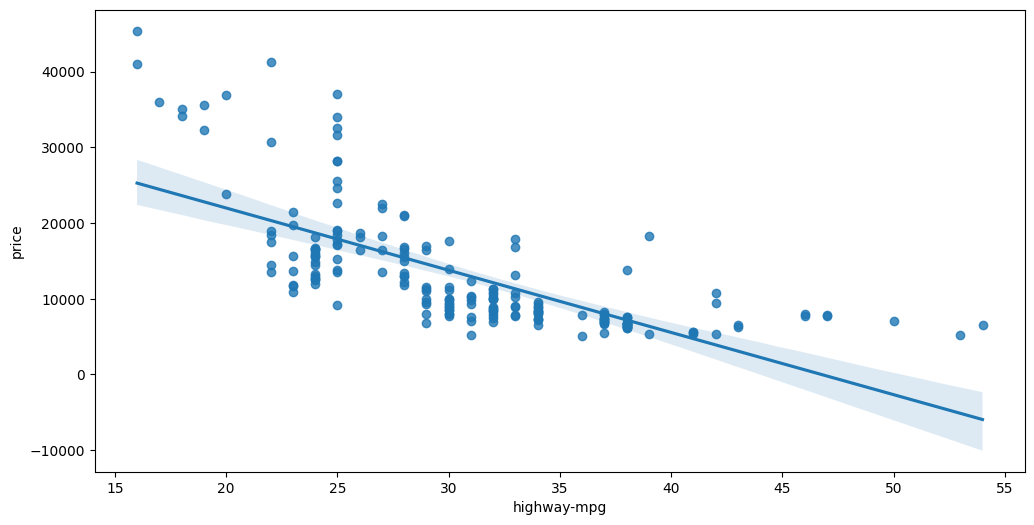

In [40]:
plt.figure(figsize=(12,6))
sns.regplot(x='highway-mpg',y='price', data=df)
plt.show()

<li> we see slope of the line in negative, which we predicted earlier when fitting simple linear regression line<li>
<li> more dispersed is the data point from the regression line, it will be not suitable to model such data point with linear regression</li>
<li>Hence, if the data is too far from the line, this linear model mighte not be best fit model fir this data</li>
<li>In abovee plot,</li>

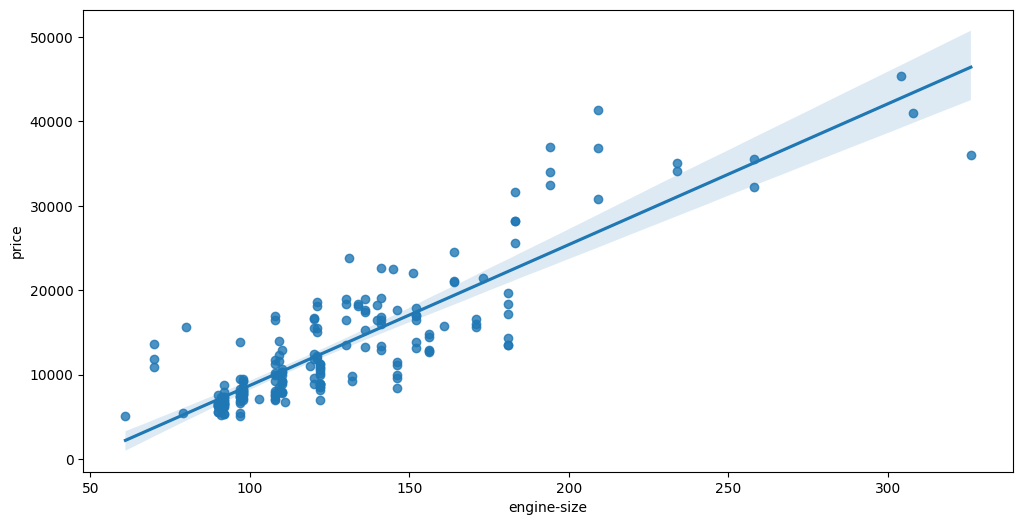

In [41]:
plt.figure(figsize=(12,6))
sns.regplot(x='engine-size',y='price', data=df)
plt.show()

<li>- this shows that increase in engine size increases the price of the car i.e. Positive correlation</li>

## Distribution Plot
<li> we successfully visualize simple linear regression model using regression plot. it will be complicatedd for multiple linear regression since there will be multiple independent variables, in such scenarios we could using distribution plot</li>

C:\Users\Asus\AppData\Local\Temp\ipykernel_3608\642475230.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Price')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3608\642475230.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

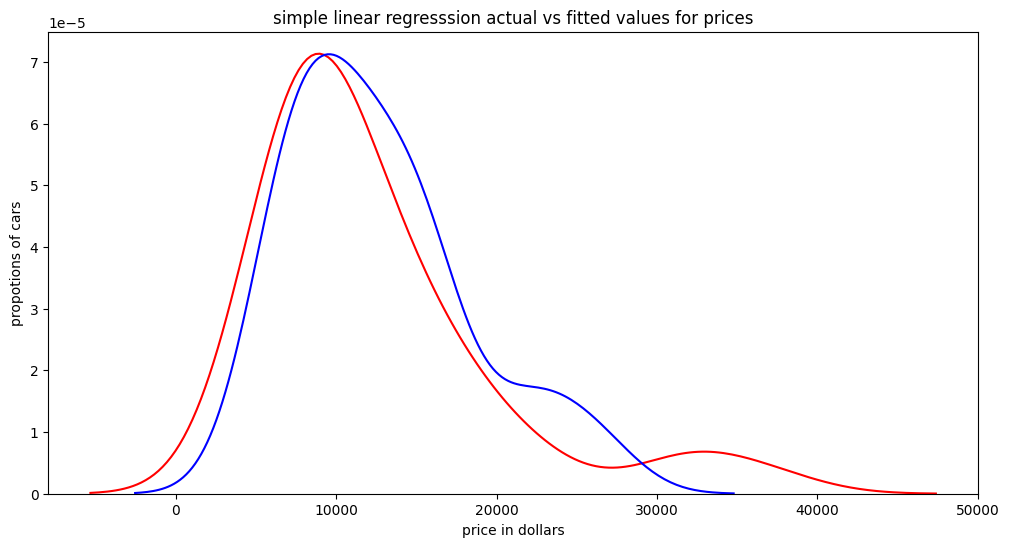

In [42]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Price')
sns.distplot(y_hat_simple, hist=False, color='b', label= ' Fitted Values', ax=ax1)
plt.title("simple linear regresssion actual vs fitted values for prices")
plt.xlabel("price in dollars")
plt.ylabel("propotions of cars")
plt.show()
plt.close()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3608\2071836063.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Price')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3608\2071836063.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

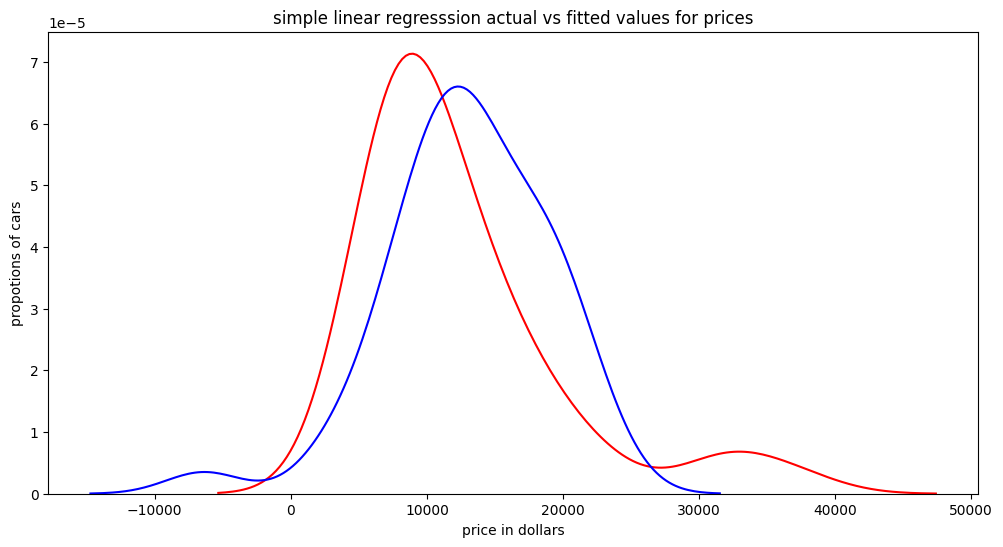

In [43]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Price')
sns.distplot(y_hat_mult, hist=False, color='b', label= ' Fitted Values', ax=ax1)
plt.title("simple linear regresssion actual vs fitted values for prices")
plt.xlabel("price in dollars")
plt.ylabel("propotions of cars")
plt.show()
plt.close()

## from above 2 distribution plot, we can say that,
<li> modeling using multiple linear regression is far better than compared to simple linear regression</li>
<li> This is because overlapping area of distribution plot between actual and predicted values is higher incase of multiple linear regression compared to single linear regression</li>

In [44]:



data = pd.read_csv("automobileEDA.csv")

#fit regression model
model = LinearRegression()
# X, y = data[[ "y_test", "y_hat_simple"]], data.hp

model.fit(y_test, y_hat_simple)

#display adjusted R-squared
1 - (1-model.score(y_test, y_hat_simple))*(len(y)-1)/(len(y_hat_simple)-y_test.shape[1]-1)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.